# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
hotel = pd.read_csv("INNHotelsGroup.csv")

# creating a copy of the data so that original data remains unchanged
data = hotel.copy()

# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string


There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [4]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [5]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* The dataset has **19 variables (Continuous and Categorical)** with one dependent variable (categorical).
* Dependent variable is the booking_status which is of categorical type.
* There are no missing values in the dataset.

In [6]:
print(
    "-" * 50, "\nDuplicate values :  \n\n", data.duplicated().sum()
)  #  count of duplicate values

-------------------------------------------------- 
Duplicate values :  

 0


<IPython.core.display.Javascript object>

* There are no duplicate values in the dataset.

### Summary of the dataset.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

* `no_of_adults`  : The mean value is 2 and the maximum value is 4. 
* `no_of_children`: The maximum value is 10,but the 25th and 75th percentile value shows as zero; i.e the number of 
   children in the dataset is less.The high values indicates the presence of outliers.
* `no_of_weekend_nights` and `no_of_week_nights`: We can observe that the number of week nights the guest stayed or booked
   to stay at the hotel is comparitively greater than that of weekend nights.
* `arrival_year`: The data mainly contains booking that were made in 2018.
* `avg_price_per_room`: The average price per room is 103 Euros.The 75th quartile is 120 Euros and maximum value is 
   540 Euros. It shows the presence of outliers in average price as well.

In [8]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset.

In [9]:
print("-" * 50, "\nUnique values :  \n\n", data.nunique())  #  count of unique values

-------------------------------------------------- 
Unique values :  

 Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


<IPython.core.display.Javascript object>

* The Booking_ID is just an identifier, its unqiue for each entry.
* We will drop the Booking_ID for further analysis.

In [10]:
data = data.drop(["Booking_ID"], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

**Lets us look at different levels in categorical variables**

In [11]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

**Meal Plan**
* There are 3 different types of Meal Plan. Meal Plan 1 is the most opted one and there are around 5130 bookings that havent opted for any meal plan.
* Only very few have opted for Meal Plan 3.


**Room Type**
* There are 7 different room types. 
* The most booked is Room Type 1 and least is Room Type 3.


**Market Segment Type**
* There are 5 different segments.
* Most of the bookings were made for segment 'online'.


**Booking status**
* We could observe that there is significant number of cancellations.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### `no_of_adults`

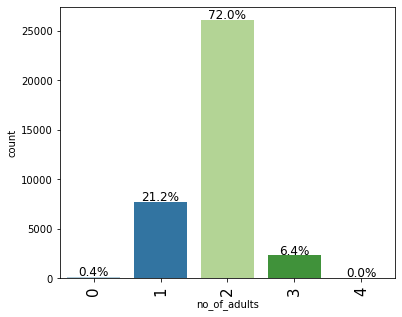

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "no_of_adults", perc=True)

* Majority of the booking  i.e. 72%  were made for 2 adults.These can be bookings made by couples.
* A very few records(0.4%) have 0 as adult count. 

In [16]:
df_zero_adult = data[data["no_of_adults"] == 0]
df_zero_adult.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44000,1,Not_Canceled
287,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38000,1,Canceled
653,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68000,1,Not_Canceled
937,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67000,1,Not_Canceled
954,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [17]:
df_zero_adult["no_of_children"].value_counts()

2    133
3      5
1      1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

* The records with adult count as zero are bookings made only for children.

### `no_of_children`

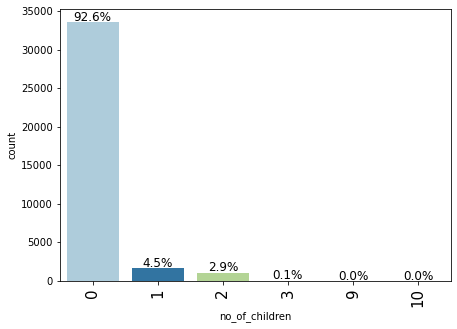

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "no_of_children", perc=True)

* Majority of the booking (92.6%) doesnt have any children.
* There is negligible bookings made for children count 9 and 10. We will add up categories 9 and 10 under count 3 for further analysis.

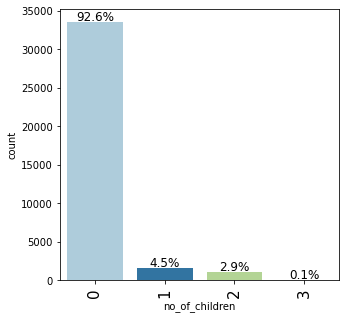

<IPython.core.display.Javascript object>

In [19]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

labeled_barplot(data, "no_of_children", perc=True)

### `no_of_weekend_nights`

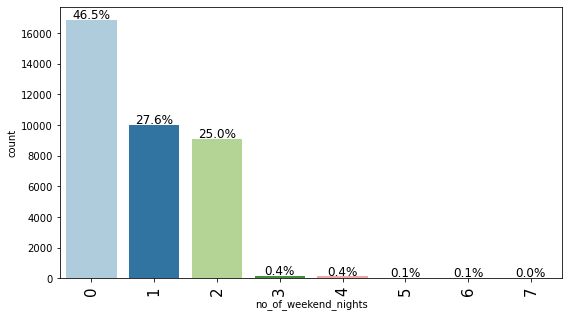

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

* Majority of the bookings (~47%) doesnt have weekend nights.

### `no_of_week_nights`

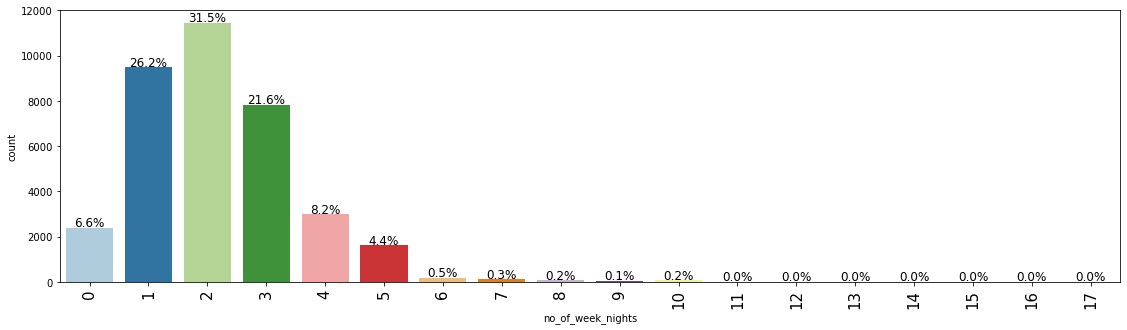

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "no_of_week_nights", perc=True)

* The most number bookings have been made for 2 week day nights.
* There are very few bookings for nights more than 10,  with a maximum of 17.

### `type_of_meal_plan`

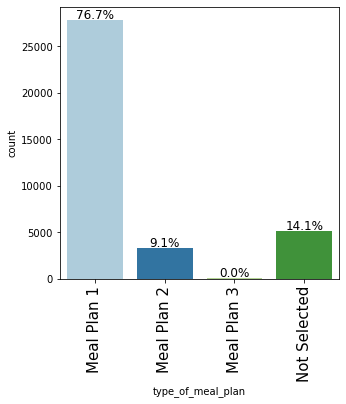

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* Approx 76% have opted for Meal Plan 1, where as there is 14% of the bookings that havent selected any mean plan.
* The least opted meal plan is Meal Plan 3.

### `required_car_parking_space `

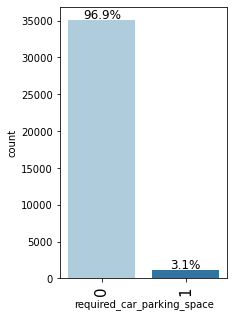

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* Most of the bookings (~97%) havenot chosen parking space.

### `room_type_reserved `

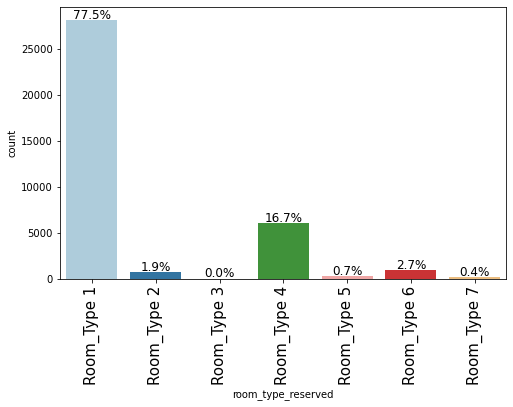

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Approx 78% have opted for Room Type 1.
* The least preferred room type is 3.

### `arrival_year `

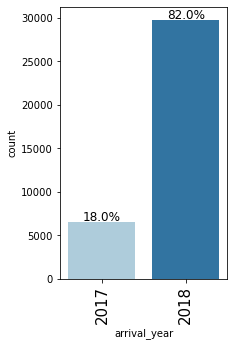

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "arrival_year", perc=True)

* 82% of the bookings have arrival year 2018.

### Q1. What are the busiest months in the hotel?

### `arrival_month `

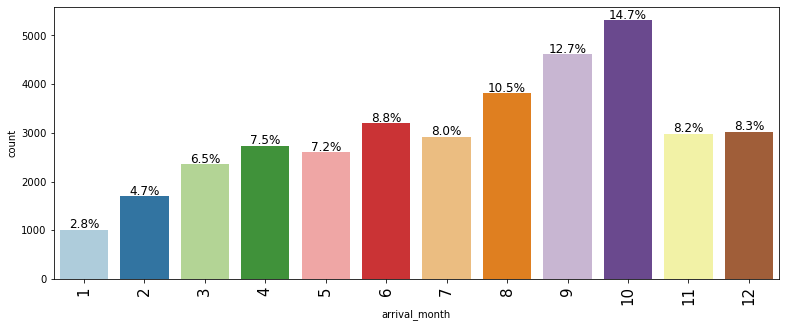

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "arrival_month", perc=True)

* We could observe that October, September and August months shows most number of bookings.
* January has the least number of booking.

### Q2. Which market segment do most of the guests come from?

### `market_segment_type `

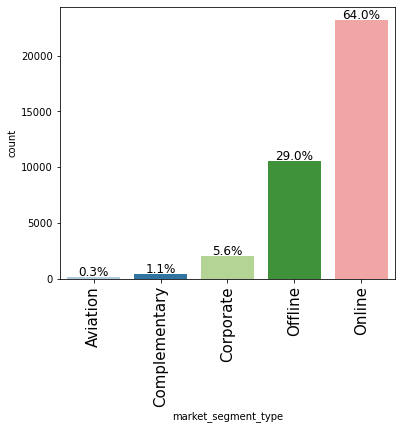

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "market_segment_type", perc=True)

* Most of the guests came from market segment 'Online', which has 64% booking.

### `no_of_special_requests `

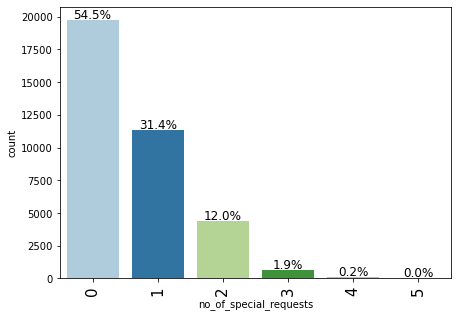

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* More than half of the customers have not given any special request.

### Q4.What percentage of bookings are canceled? 

### `booking_status `

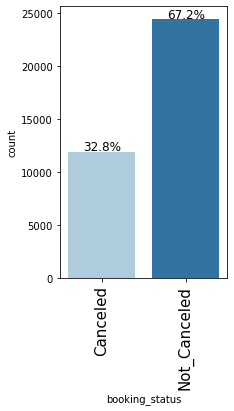

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "booking_status", perc=True)

* Bookings that were cancelled is around 33%.

In [30]:
# Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

### `lead_time `

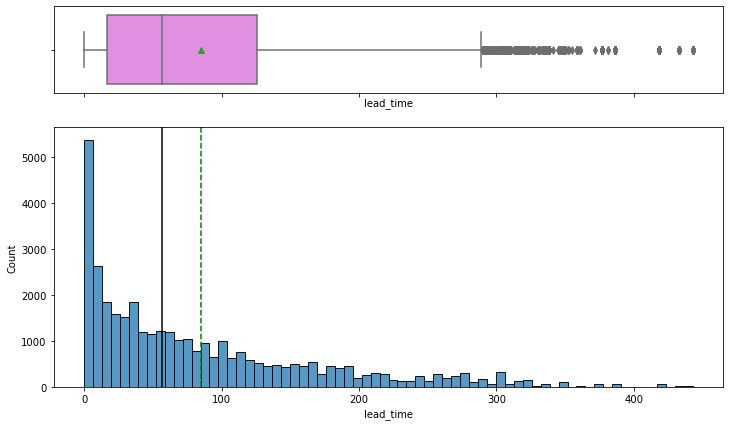

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "lead_time")

* The distribution is skewed to right, with an average lead time of around 85 days.
* There is considerable number of bookings with zero/one day as lead time.
* We can observe outliers in the distribution as well.

In [32]:
df_lead_time = data[data["lead_time"] <= 5]
df_lead_time["lead_time"].value_counts()

0    1297
1    1078
2     643
3     630
4     628
5     577
Name: lead_time, dtype: int64

<IPython.core.display.Javascript object>

### `avg_price_per_room `

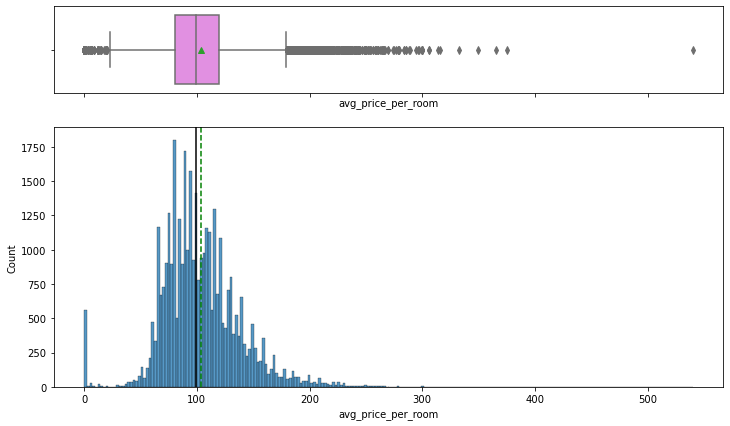

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "avg_price_per_room")

* We can observe that the distribution is almost normal with outliers in both sides.
* The mean value is around 103 Euros.
* There are some bookings with average price as zero. Lets check the segments for those records.

In [34]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* The price is indicated as zero mainly for Complementary bookings.
* There are few online bookings also with average price 0.

### `no_of_previous_cancellations `

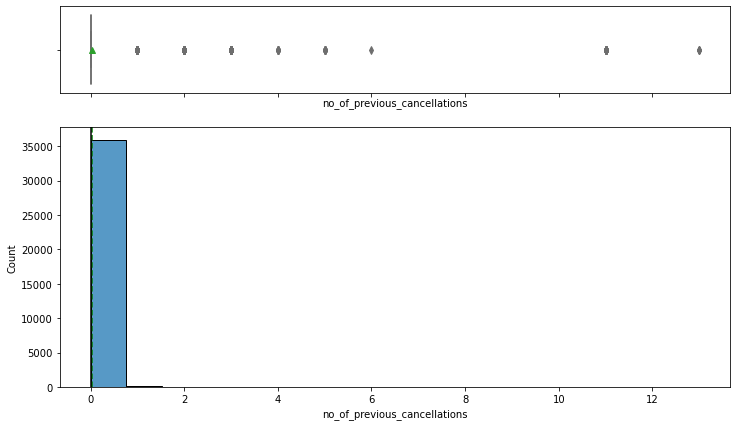

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "no_of_previous_cancellations")

* Majority has previous cancellation as 0, whereas we could observe a very few bookings have 1 previous cancellation.

### `no_of_previous_bookings_not_canceled `

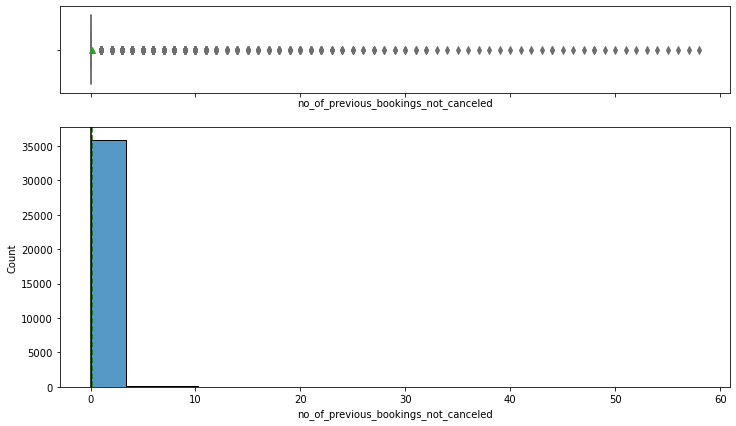

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* We can observe that most records have number of previous bookings not cancelled also close to zero.  

### Bivariate Analysis

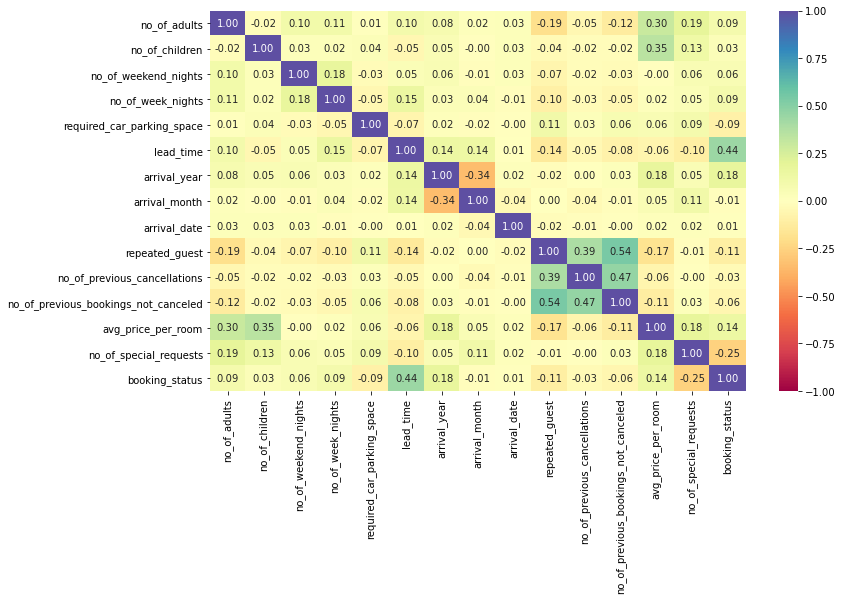

<IPython.core.display.Javascript object>

In [37]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* No significant case of high correlation among variables observed.
* We can observe that `avg_price_per_room` has positive correlation with `no_of_adults` and `no_of_children`.
* Also, there is positive correlation between `no_of_previous_bookings_not_canceled` and `repeated_guest`. 
* `lead_time` has a positive correlation with `booking_status`. As lead time increases, the chances of getting the booking cancelled is more.

**Creating functions that will help us with further analysis.**

In [38]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Q3.Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

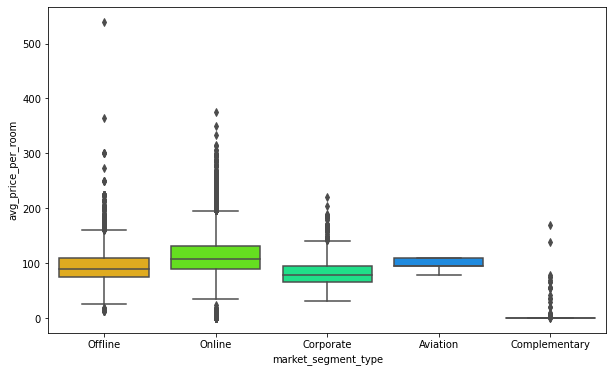

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* The average price per room for market segment 'online'is comparitvely higher than other segments.
* For 'Offline' and 'Çorporate'segments the average price is almost same.
* For 'Aviation'even though the booking is less in number, the price is high.
* There are outliers present for every market segments.

### Market Segment vs Booking Status

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


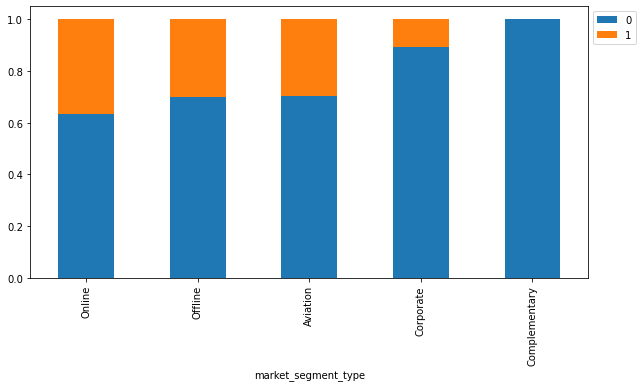

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "market_segment_type", "booking_status")

* We saw earlier that market segment 'Online' has majority of the bookings. The cancellations are also comparitively more in 'Online' segment.
* 'Offline' and 'Aviation' shows similar percentage of cancellation.
* Majority of the bookings are confirmed for 'Corporate' segment.

### Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### No of Special requests vs Booking Status

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


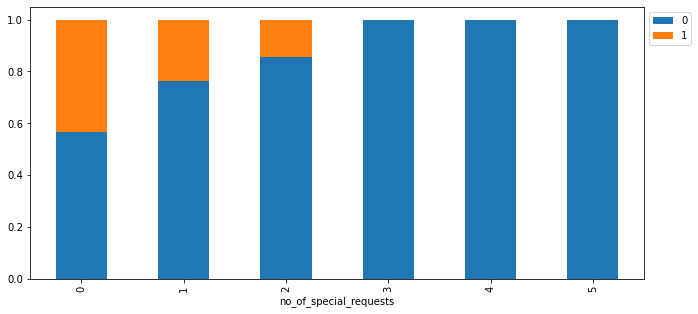

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* We could observe that chances of getting the booking confirmed is more with number of special requests.

* The guests who have one or more special requests are less likely to cancel their bookings.

### No of weekend nights vs Booking Status

booking_status            0      1    All
no_of_weekend_nights                     
All                   24390  11885  36275
0                     11779   5093  16872
1                      6563   3432   9995
2                      5914   3157   9071
4                        46     83    129
3                        79     74    153
5                         5     29     34
6                         4     16     20
7                         0      1      1
------------------------------------------------------------------------------------------------------------------------


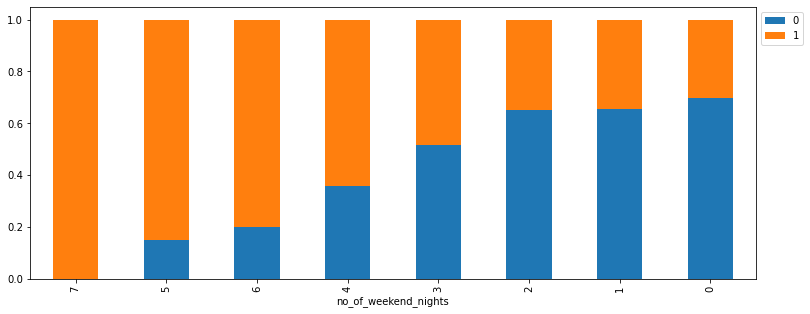

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

* As the no of weekend nights increases, the chances of getting the booking cancelled is higher.

### No of weekday nights vs Booking Status

booking_status         0      1    All
no_of_week_nights                     
All                24390  11885  36275
2                   7447   3997  11444
3                   5265   2574   7839
1                   6916   2572   9488
4                   1847   1143   2990
0                   1708    679   2387
5                    982    632   1614
6                    101     88    189
10                     9     53     62
7                     61     52    113
8                     30     32     62
9                     13     21     34
11                     3     14     17
15                     2      8     10
12                     2      7      9
13                     0      5      5
14                     3      4      7
16                     0      2      2
17                     1      2      3
------------------------------------------------------------------------------------------------------------------------


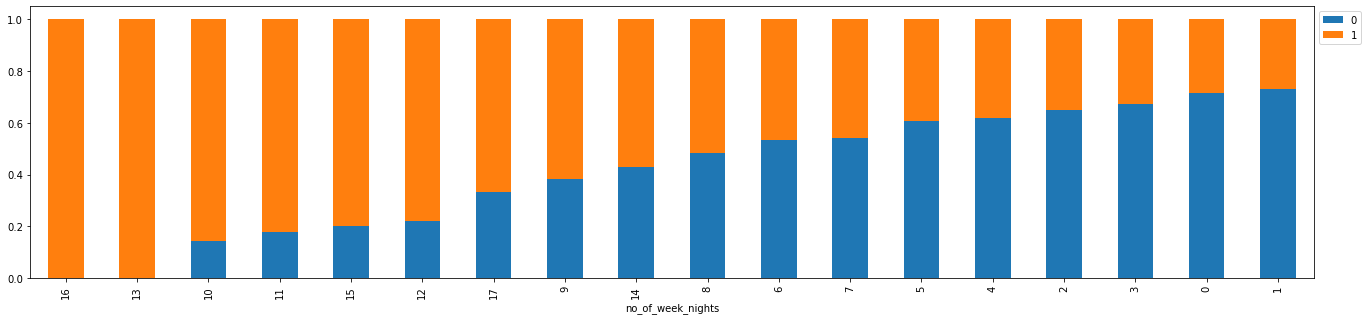

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

* We can observe similar pattern with week nights too.As the stay duration increases, the chances of getting the booking cancelled is higher.

### No of Special request vs Average price per room

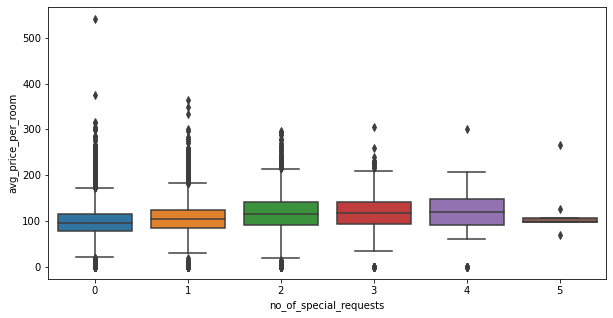

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="no_of_special_requests", y="avg_price_per_room")
plt.show()

* With the number of special requests, the average price per room increases. 

### Average price per room vs Booking status

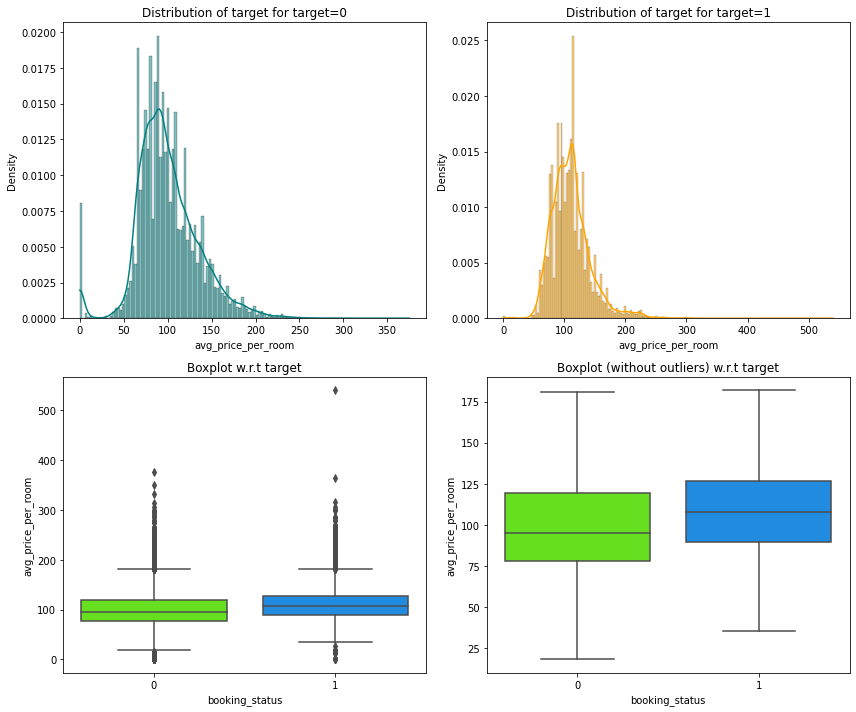

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* When average price per room is high, chances to get cancelled is comparitively more.

###  Lead time vs Booking status 

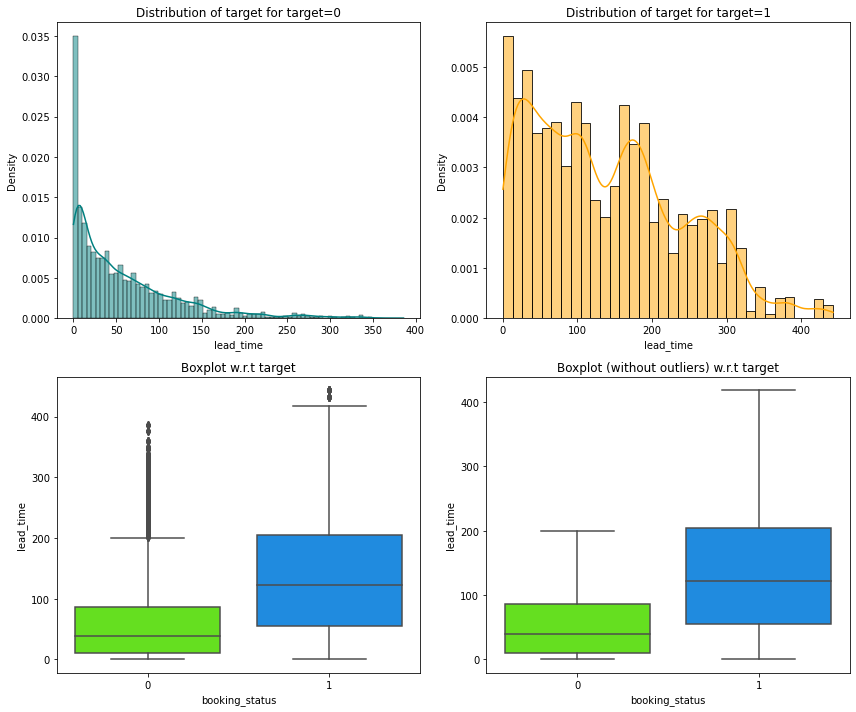

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* The distribution of lead time for confirmed booking is highly skewed to right.
* Most of the confirmed booking has 0 lead time.
* The average lead time for the bookings that are cancelled is comparitively higher than that of confirmed booking.
  i.e As lead time increases, there is more probabilty that the booking gets cancelled.

###  Booking for families

In [48]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [49]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


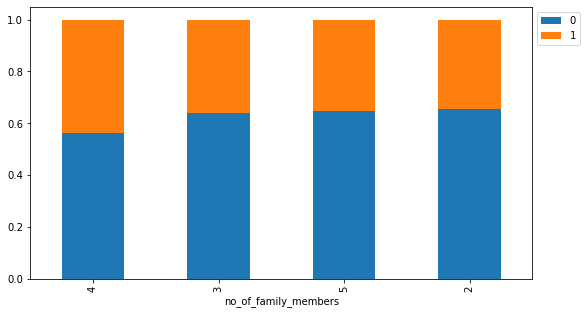

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* The number of family members doesnt seem to have significant impact on booking cancellations.

### Lets analyse further by grouping the booking into Families/Friends,Couples and  Single. 

In [51]:
data["group"] = "None"

data.loc[
    (data["no_of_adults"] == 1) & (data["no_of_children"] == 0), "group"
] = "Single"
data.loc[
    (data["no_of_adults"] == 2) & (data["no_of_children"] == 0), "group"
] = "Couple"
data.loc[
    (data["no_of_adults"] > 2) | (data["no_of_children"] > 0), "group"
] = "Family/Friends"

<IPython.core.display.Javascript object>

In [52]:
data = data.drop(["no_of_adults"], axis=1)
data = data.drop(["no_of_children"], axis=1)
data.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,group
0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0,Couple
1,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0,Couple
2,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1,Single
3,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1,Couple
4,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1,Couple


<IPython.core.display.Javascript object>

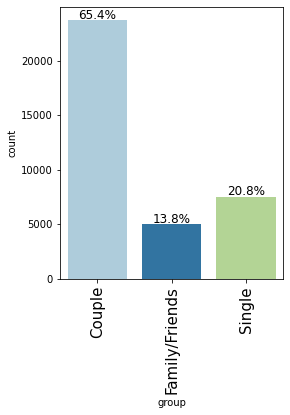

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data, "group", perc=True)

* 65.4% of total booking is made by couples.

booking_status      0      1    All
group                              
All             24390  11885  36275
Couple          15506   8213  23719
Family/Friends   3142   1863   5005
Single           5742   1809   7551
------------------------------------------------------------------------------------------------------------------------


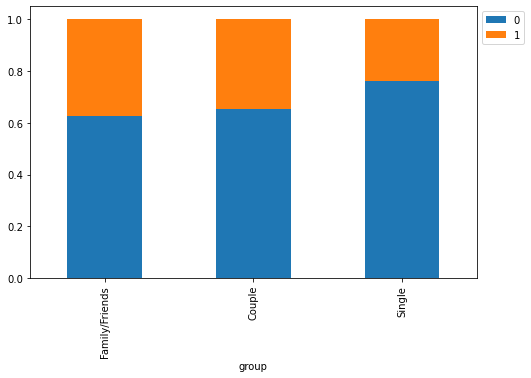

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "group", "booking_status")

* Couple booking is highest in number.
* We can observe that the cancellation rate is more in  Family/Friends and Couple group than in Single booking. 

### Let's do a similar analysis for the customer who stay for at least a day at the hotel.

In [55]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 17)

<IPython.core.display.Javascript object>

In [56]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

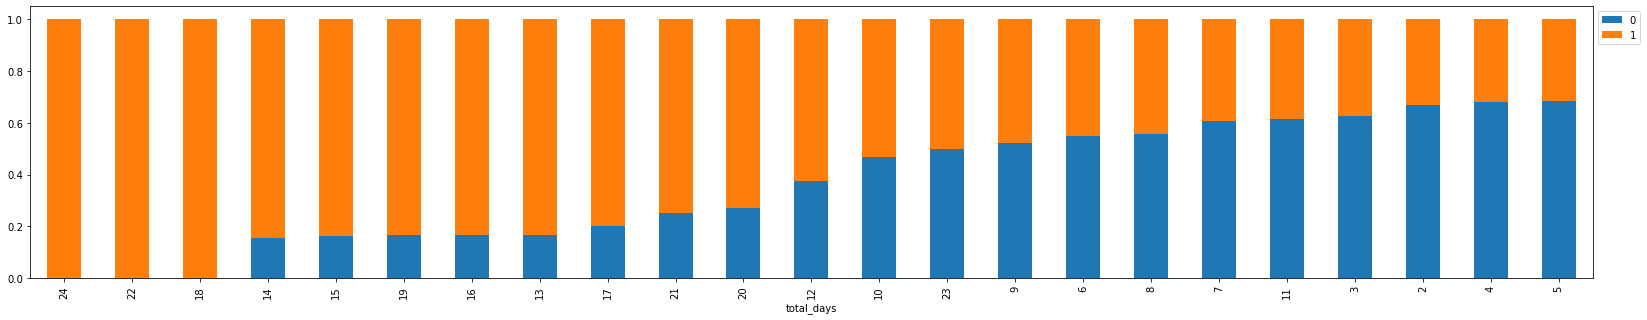

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(stay_data, "total_days", "booking_status")

* As the number of weekday/weekend night increases, the chances of getting the booking confirmed is less.

### Q5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


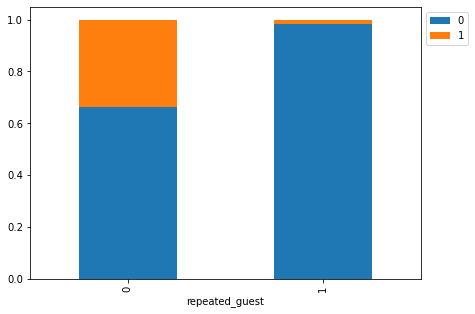

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "repeated_guest", "booking_status")

* The number of cancellations is very less for a repeated guest.

repeated_guest           0    1    All
market_segment_type                   
All                  35345  930  36275
Corporate             1415  602   2017
Complementary          265  126    391
Online               23118   96  23214
Offline              10438   90  10528
Aviation               109   16    125
------------------------------------------------------------------------------------------------------------------------


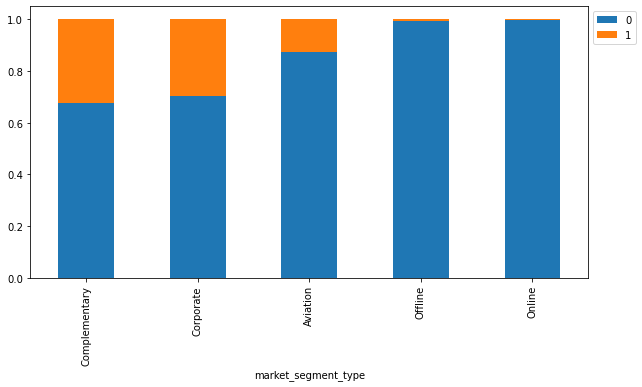

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "market_segment_type", "repeated_guest")

* Majority of the repeated guest are from market segments - Complementary and Corporate segments.
* Even though bookings made by online segments are high, the repeated guest count is very less. 

<AxesSubplot:xlabel='market_segment_type', ylabel='repeated_guest'>

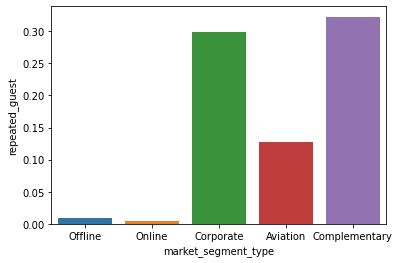

<IPython.core.display.Javascript object>

In [60]:
sns.barplot(data=data, x="market_segment_type", y="repeated_guest", ci=None)

* Complementary and Corporate segments have more number of repeated guest.

###  Market Segment type vs No of Special Requests 

<AxesSubplot:xlabel='market_segment_type', ylabel='no_of_special_requests'>

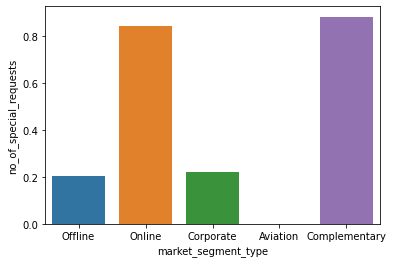

<IPython.core.display.Javascript object>

In [61]:
sns.barplot(data=data, x="market_segment_type", y="no_of_special_requests", ci=None)

* Online and Complementary segments have more number of special requests.

###  Market Segment type vs No of Previous cancellations

<AxesSubplot:xlabel='market_segment_type', ylabel='no_of_previous_cancellations'>

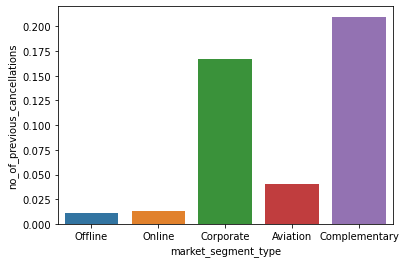

<IPython.core.display.Javascript object>

In [62]:
sns.barplot(
    data=data, x="market_segment_type", y="no_of_previous_cancellations", ci=None,
)

* Previous booking cancellations are more in Complimentary and Corporate Segment.

###  Market Segment type vs No of Previous bookings not canceled

<AxesSubplot:xlabel='market_segment_type', ylabel='no_of_previous_bookings_not_canceled'>

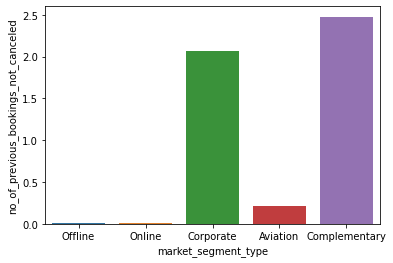

<IPython.core.display.Javascript object>

In [63]:
sns.barplot(
    data=data,
    x="market_segment_type",
    y="no_of_previous_bookings_not_canceled",
    ci=None,
)

* As more repeated guest is from Complementary and Corporate Segments, Previous booking confirmations are more in these segments.

###  Arrival Month vs Booking Status 

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


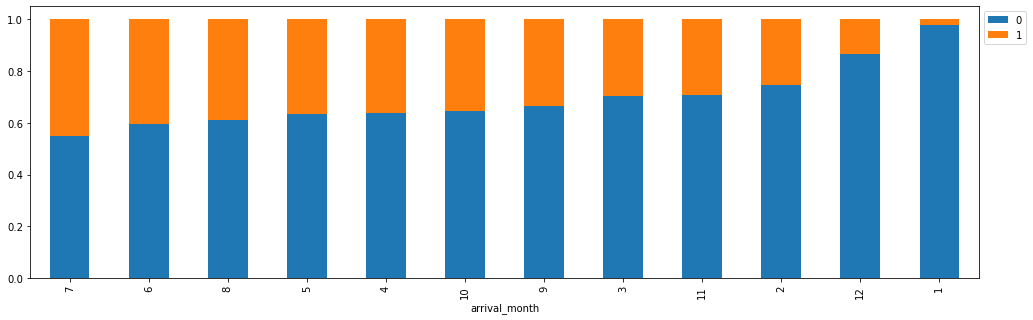

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "arrival_month", "booking_status")

* Most booking cancellations happens in the month of July and June months.

###  Required_car_parking_space vs Booking Status

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


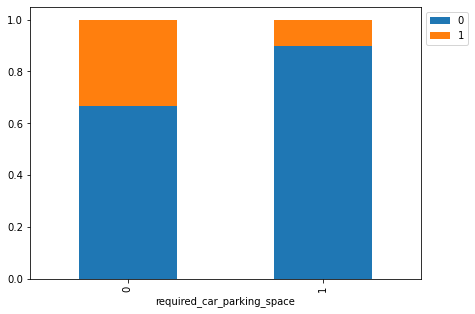

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* Bookings that opted for car parking space have less chances of cancellation.

## Data Preprocessing

- Missing value treatment (if needed)
  *  There are no missing values in data.
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
  *  Outliers for average price - Has been substituted with upper whisker value. 
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Feature Engineering

#### Converting object to category type

In [66]:
cat_vars = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "group"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_weekend_nights                  36275 non-null  int64   
 1   no_of_week_nights                     36275 non-null  int64   
 2   type_of_meal_plan                     36275 non-null  category
 3   required_car_parking_space            36275 non-null  int64   
 4   room_type_reserved                    36275 non-null  category
 5   lead_time                             36275 non-null  int64   
 6   arrival_year                          36275 non-null  int64   
 7   arrival_month                         36275 non-null  int64   
 8   arrival_date                          36275 non-null  int64   
 9   market_segment_type                   36275 non-null  category
 10  repeated_guest                        36275 non-null  int64   
 11  no

<IPython.core.display.Javascript object>

**1.Booking_status was changed to encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis.**

**2.New column 'group'is added based on the columns no_of_adults and no_of_children.**

**3.Column Booking_ID was deleted as its just an identifier.**


### Outlier Check

- Let's check for outliers in the data.

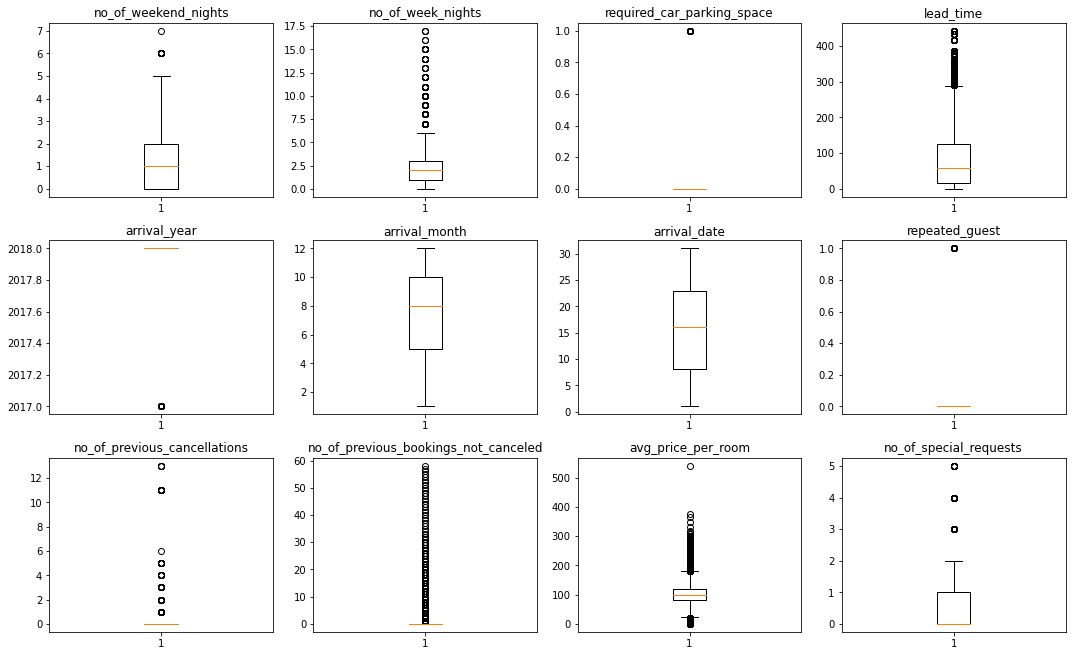

<IPython.core.display.Javascript object>

In [67]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier detection using IQR 

In [68]:
# For avg_price_per_room

print("Column - avg_price_per_room")
quartiles = np.quantile(
    data["avg_price_per_room"][data["avg_price_per_room"].notnull()], [0.25, 0.75]
)

avg_price_per_room_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {avg_price_per_room_4iqr}")
outlier_avg_price_per_room = data.loc[
    np.abs(data["avg_price_per_room"] - data["avg_price_per_room"].median())
    > avg_price_per_room_4iqr,
    "avg_price_per_room",
]

print(outlier_avg_price_per_room)

print("-" * 50)

Column - avg_price_per_room
Q1 = 80.3, Q3 = 120.0, 4*IQR = 158.8
1422    259.20000
1787    263.91000
2401    297.00000
2409    265.00000
3499    266.67000
4150    306.00000
4734    263.55000
4952    260.50000
5163    300.00000
5356    261.00000
5445    279.20000
7984    275.00000
9461    375.50000
9839    260.90000
10709   285.17000
11530   266.30000
12928   265.44000
13293   260.00000
13911   300.00000
13944   316.00000
14046   299.33000
14402   278.00000
14773   332.57000
15598   262.70000
16301   289.00000
17448   288.00000
17506   283.67000
20731   294.00000
20864   259.00000
20900   365.00000
21330   277.00000
22516   278.00000
22773   269.30000
25670   306.00000
25714   260.40000
27693   266.30000
28234   296.00000
28310   264.10000
28713   284.10000
29779   300.00000
30151   269.30000
30475   300.00000
31334   285.17000
33114   540.00000
33955   314.10000
34306   349.63000
34393   274.20000
34599   278.90000
35970   300.00000
Name: avg_price_per_room, dtype: float64
------------

<IPython.core.display.Javascript object>

In [69]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [70]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the booking_status which is of categorical data type.
* Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type and booking_status are of categorical type while 
  other variables are of interger type
* There are no missing values in the dataset.

**Data Cleaning:**

* Dropped the Booking_ID column as its just an identifier.
* Booking_status was changed to encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis.
* New column 'group'is added based on the columns no_of_adults and no_of_children.

**Observations from EDA:**

* `no_of_adults`:  Majority of the bookings  i.e. 72%  were made for 2 adults.These can be bookings made by couples.
* `no_of_children`: Booking with children is only 8% of the entire dataset.
* `no_of_weekend_nights`: Majority of the bookings (~47%) doesnt have weekend nights.
* `no_of_week_nights`: The most number bookings (~32%) have been made for 2 week day nights.
* `type_of_meal_plan`: There are 3 different types of Meal Plan. Meal Plan 1 is the most opted one and there are around
   5130 bookings that havent opted for any meal plan.Only very few have opted for Meal Plan 3.
* `room_type_reserved`:There are 7 different room types. The most booked is Room Type 1 and least is Room Type 3.
* `market_segment_type`:There are 5 different segments.Most of the bookings were made for segment 'online'.The
   cancellations are also comparitively more in 'Online' segment.Majority of the bookings are confirmed for 'Complimentary' 
   and 'Corporate' segment.
* `required_car_parking_space `: Most of the bookings (~97%) havenot chosen parking space.Bookings that opted for car 
   parking space have less chances of cancellation.
* `arrival_month `: We could observe that October, September and August months shows most number of bookings.Most booking 
   cancellations happens in the month of July and June.
* `avg_price_per_room ` : The mean value is around 103 Euros.There's a considerable difference in the 75th percentile and 
   maximum value of average price indicating the presence of outliers.
* `lead_time` : The distribution is skewed to right, with an average lead time of around 85 days.There is considerable 
   number of bookings with zero/one day as lead time. It has a positive correlation with `booking_status`. i.e As lead time
   increases, the chances of getting the booking cancelled is more.
* `no_of_special_requests` :  The chances of getting the booking confirmed is more with number of special requests.The
   guests who have one or more special requests are less likely to cancel their bookings.
* `group` : Couple booking is highest in number in the dataset.The proportion of cancellations in single booking is 
   comparitively less.
* `repeated_guest` : The number of cancellations is very less for a repeated guest. Complementary and Corporate segments 
   have more repeated guest.   
* `booking_status ` : Bookings that were cancelled is around 33%.


## Building a Logistic Regression model

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Creating training and test sets.**

In [71]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [72]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [73]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [74]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [75]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [76]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                  0.3295
Time:                        01:13:44   Log-Likelihood:                -10789.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -934.3693    120.725     -7.740      0.000   -1170.985    -697.754
no_of_weekend_nights                     0.1064      

<IPython.core.display.Javascript object>

In [77]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80580,0.63339,0.73960,0.68238


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of booking getting cancelled decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of booking getting cancelled increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [78]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [79]:
checking_vif(X_train)

,feature,VIF
0,const,39470379.67234
1,no_of_weekend_nights,1.06967
2,no_of_week_nights,1.09649
3,required_car_parking_space,1.04013
4,lead_time,1.39140
5,arrival_year,1.43096
6,arrival_month,1.27582
7,arrival_date,1.00688
8,repeated_guest,1.78569
9,no_of_previous_cancellations,1.39612


<IPython.core.display.Javascript object>

* Some categorical levels of market segment type such as market_segment_type_Corporate, market_segment_type_Offline and market_segment_type_Online exhibit high multicollinearity.

#### Dropping market_segment_type_Corporate

In [80]:
X_train1 = X_train.drop("market_segment_type_Corporate", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                                  39396353.85272
no_of_weekend_nights                          1.06763
no_of_week_nights                             1.09460
required_car_parking_space                    1.04012
lead_time                                     1.39059
arrival_year                                  1.42860
arrival_month                                 1.27530
arrival_date                                  1.00687
repeated_guest                                1.78052
no_of_previous_cancellations                  1.39557
no_of_previous_bookings_not_canceled          1.65008
avg_price_per_room                            2.10274
no_of_special_requests                        1.25025
type_of_meal_plan_Meal Plan 2                 1.27909
type_of_meal_plan_Meal Plan 3                 1.02531
type_of_meal_plan_Not Selected                1.27787
room_type_reserved_Room_Type 2                1.04870
room_type_reserved_Room_Type 3                1

<IPython.core.display.Javascript object>

* Removal of market_segment_type_Corporate has fixed multicollinearity

In [81]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.425285
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.80588,0.63386,0.73954,0.68263


<IPython.core.display.Javascript object>

* No significant change in the model performance.

In [82]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                  0.3289
Time:                        01:13:49   Log-Likelihood:                -10799.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -958.8950    120.439     -7.962      0.000   -1194.952    -722.838
no_of_weekend_nights                     0.1112      

<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [83]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online', 'group_Single']


<IPython.core.display.Javascript object>

In [84]:
X_train2 = X_train1[selected_features]
X_test2 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [85]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                  0.3282
Time:                        01:13:51   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -943.6038    120.287     -7.845      0.000   -1179.363    -707.845
no_of_weekend_nights               0.1102      0.020      5.584      0.

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final one and *lg2* as final model.**

In [86]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63386,0.73995,0.68281


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of no_of_weekend_nights,market_segment_type_Online, lead_time, arrival_year,no_of_previous_cancellations, some levels of meal plan  and avg_price_per_room are positive; An increase in these will lead to increase in chances of cancellation. 

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, some levels of room_type, group and market_segment_type_Offline are negative; An increase in these will lead to decrease in chances of cancellation.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [87]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online,group_Single
Odds,0.00000,1.11653,1.04324,0.20274,1.01577,1.59354,0.95907,0.06569,1.25391,1.01958,0.22969,1.16358,1.30477,0.71368,0.76103,0.48161,0.47094,0.27524,0.32828,1.94211,0.80745
Change_odd%,-100.00000,11.65303,4.32398,-79.72621,1.57696,59.35434,-4.09292,-93.43068,25.39107,1.95792,-77.03125,16.35753,30.47708,-28.63150,-23.89676,-51.83889,-52.90608,-72.47647,-67.17207,94.21051,-19.25483


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of cancellation 1.12 times or a 11.65% increase in chances of cancellation.
* `lead_time`: Holding all other features constant a 1 unit change in the lead_time will increase the odds of cancellation 1.02 times or a 1.6% increase in chances of cancellation.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in no_of_special_requests will decrease the odds of cancellation 0.22 times or a 77% decrease in chances of cancellation.
* `room_type_reserved` : The odds of a booking with room_type_reserved_Room_Type2 having the booking cancelled is  0.71 less than the booking with room_type_reserved_Room_Type1 or 28.63% fewer odds of cancellation. 
* `group` : The odds of a booking in group_single having the booking cancelled is  0.81 less than the booking with group couple or 19.25% fewer odds of cancellation. 

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

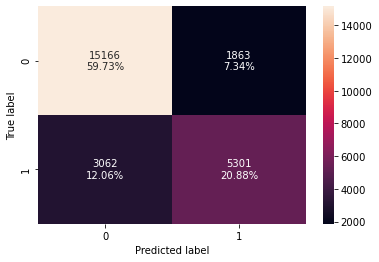

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [89]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63386,0.73995,0.68281


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

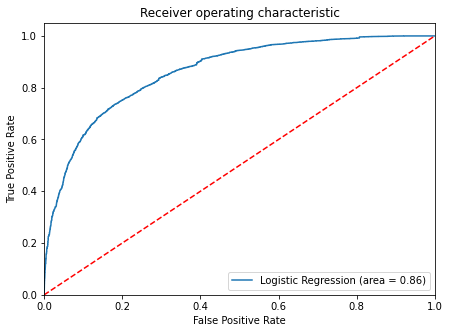

<IPython.core.display.Javascript object>

In [90]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [91]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37141176872696857


<IPython.core.display.Javascript object>

#### Checking model performance on training set

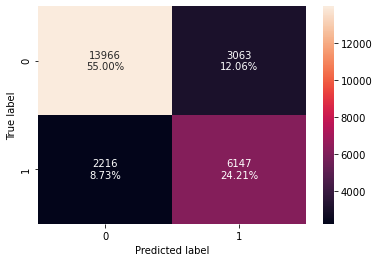

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [93]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79210,0.73502,0.66743,0.69960


<IPython.core.display.Javascript object>

* Recall and F1 score of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

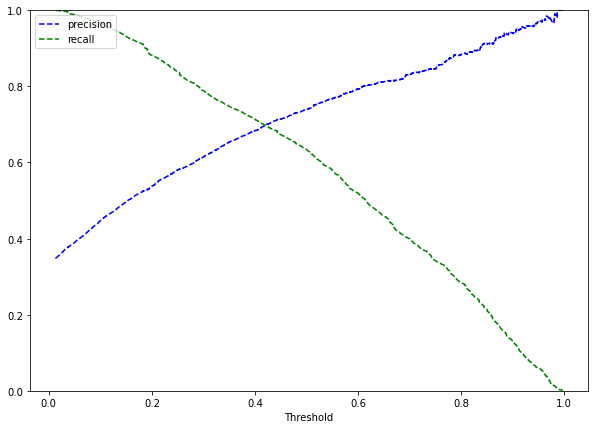

<IPython.core.display.Javascript object>

In [94]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [95]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

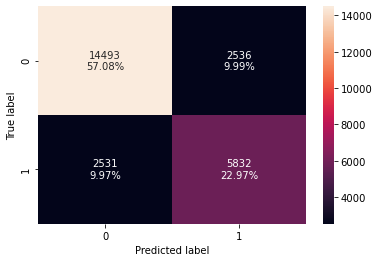

<IPython.core.display.Javascript object>

In [96]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [97]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80045,0.69736,0.69694,0.69715


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

### Model Performance Summary

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80604,0.79210,0.80045
Recall,0.63386,0.73502,0.69736
Precision,0.73995,0.66743,0.69694
F1,0.68281,0.69960,0.69715


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [99]:
X_test2 = X_test[list(X_train2.columns)]

<IPython.core.display.Javascript object>

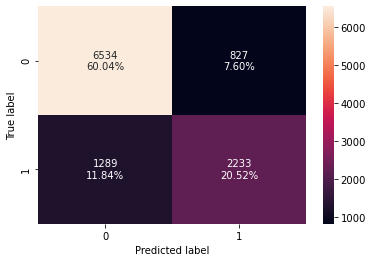

<IPython.core.display.Javascript object>

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [101]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80557,0.63401,0.72974,0.67852


<IPython.core.display.Javascript object>

* ROC curve on test set

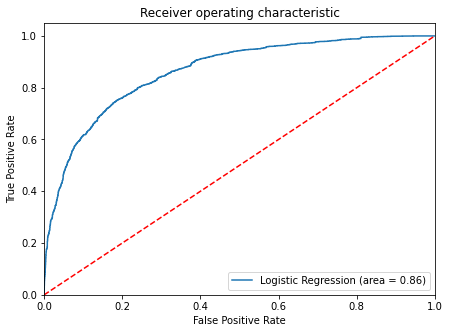

<IPython.core.display.Javascript object>

In [102]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

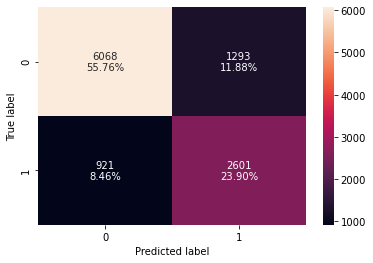

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79656,0.73850,0.66795,0.70146


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

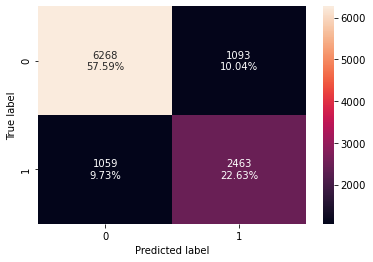

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [106]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80226,0.69932,0.69263,0.69596


<IPython.core.display.Javascript object>

### Model performance summary

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80604,0.79210,0.80045
Recall,0.63386,0.73502,0.69736
Precision,0.73995,0.66743,0.69694
F1,0.68281,0.69960,0.69715


<IPython.core.display.Javascript object>

In [108]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80557,0.79656,0.80226
Recall,0.63401,0.73850,0.69932
Precision,0.72974,0.66795,0.69263
F1,0.67852,0.70146,0.69596


<IPython.core.display.Javascript object>

### Conclusion
* We have been able to build a predictive model that can be used by hotels for finding cancellations with an f1_score of 0.69 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

- The highest recall is 73% on the training set.

- Using the model with default threshold(0.5) the model will give a low recall but good precision scores. 
- Using the model with 0.37 threshold the model will give a high recall but low precision scores.
- Using the model with 0.42 threshold the model will give a balance recall and precision score.

* Coefficient of  no_of_weekend_nights,market_segment_type_Online, lead_time, arrival_year,no_of_previous_cancellations, some levels of meal plan and avg_price_per_room are positive; An increase in these will lead to increase in chances of cancellation. 

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, some levels of room_type, group_single and market_segment_type_Offline are negative; An increase in these will lead to decrease in chances of cancellation.


## Decision Tree 

In [109]:
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [110]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [111]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [112]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [113]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [114]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking model performance on test set

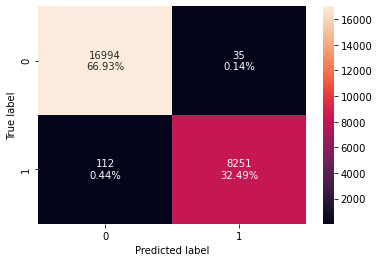

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(model, X_train, y_train)

* Model is able to perfectly classify almost all the data points on the training set.
* Negligible errors on the training set, majority of samples has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

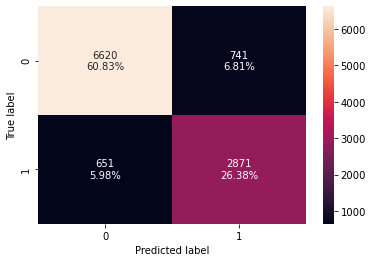

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(model, X_test, y_test)

In [117]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87209,0.81516,0.79485,0.80488


<IPython.core.display.Javascript object>

* Model is giving good and generalized results on training and test set.

**Before pruning the tree let's check the important features.**

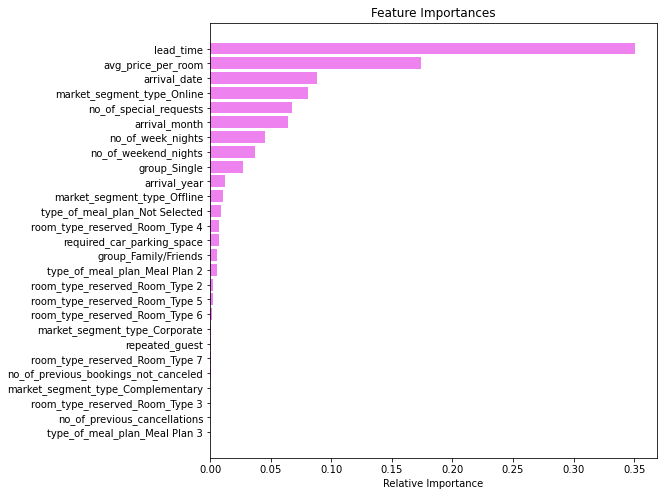

<IPython.core.display.Javascript object>

In [118]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead time is the most important variable for predicting the cancellation.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

### Pruning the tree

**Pre-Pruning**

In [119]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

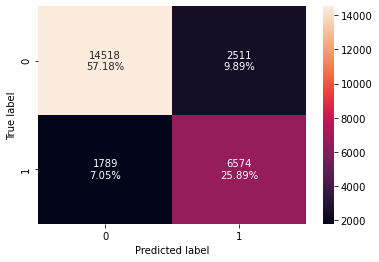

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [121]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83066,0.78608,0.72361,0.75355


<IPython.core.display.Javascript object>

#### Checking performance on test set

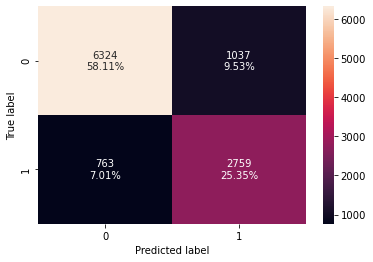

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [123]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83460,0.78336,0.72682,0.75403


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.
* Training and test scores are comparable.

### Visualizing the Decision Tree

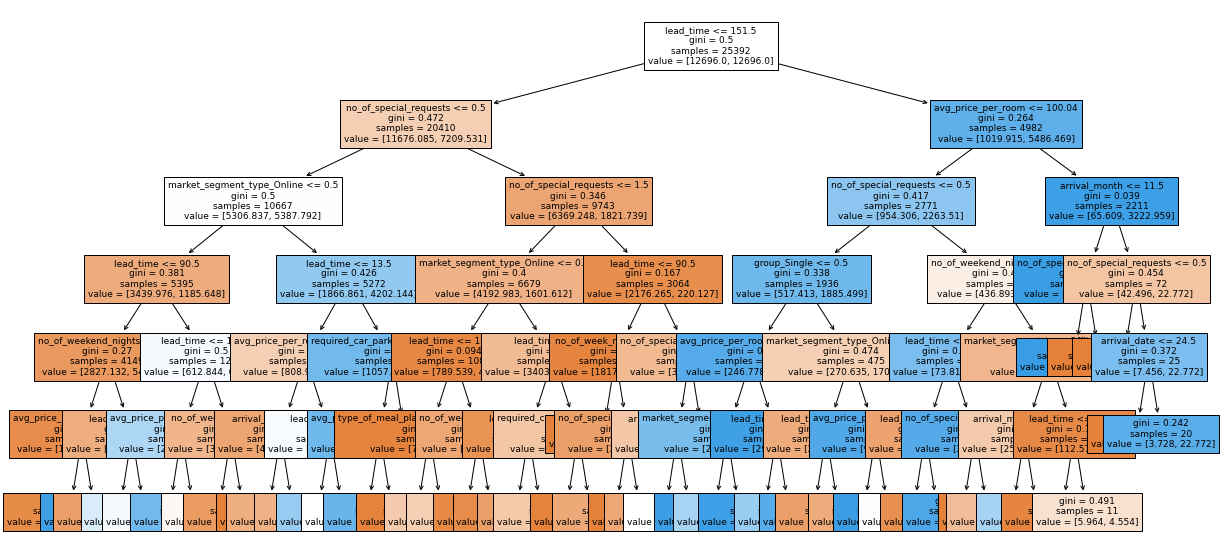

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a booking is made with a lead time less than 151 days and  it is special requests and market segment type is Online and lead time <= 90.50 and for weekend_nights and avg_price_per_room <=196.50, booking will not be cancelled. But if avg_price_per_room > 196.50 booking will be cancelled.

`Interpretations from other decision rules can be made similarly`

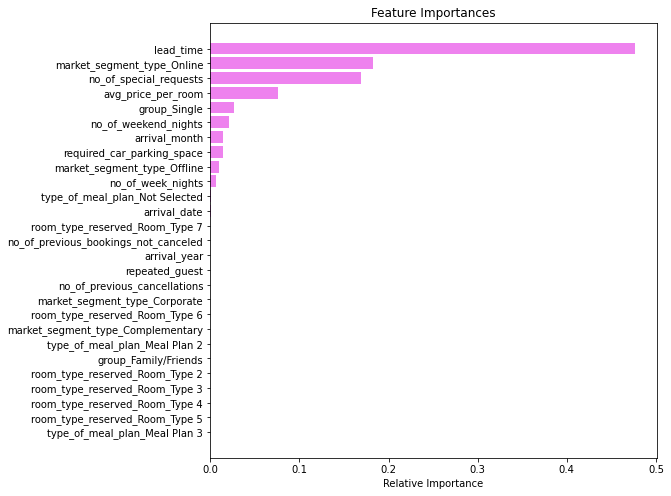

<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree, Lead time is the most important feature followed by market segment online.

**Cost Complexity Pruning**

In [127]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [128]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1886,0.00890,0.32806
1887,0.00980,0.33786
1888,0.01272,0.35058
1889,0.03412,0.41882


<IPython.core.display.Javascript object>

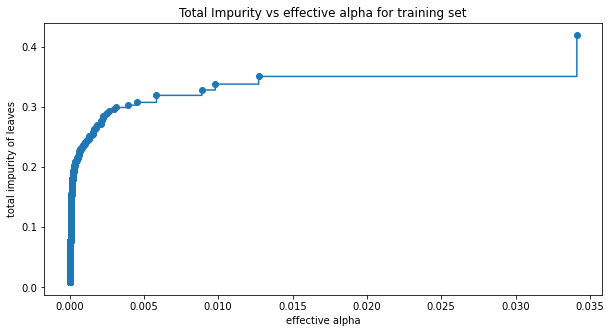

<IPython.core.display.Javascript object>

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [130]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913691


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

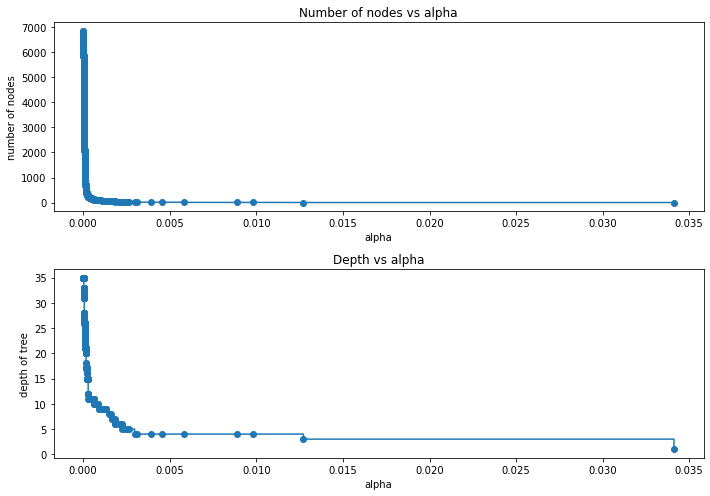

<IPython.core.display.Javascript object>

In [131]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [132]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

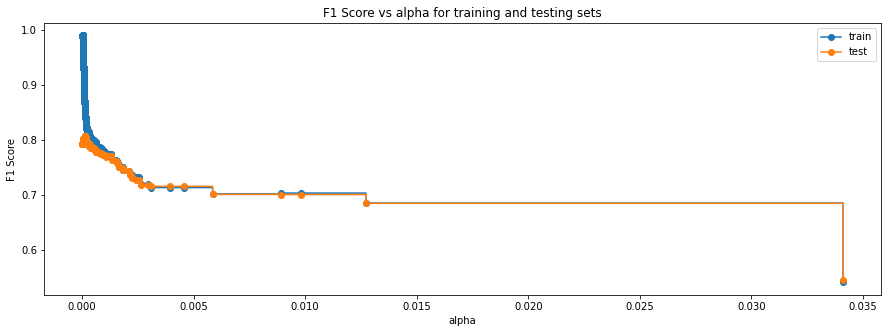

<IPython.core.display.Javascript object>

In [133]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [134]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001292084470040448, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

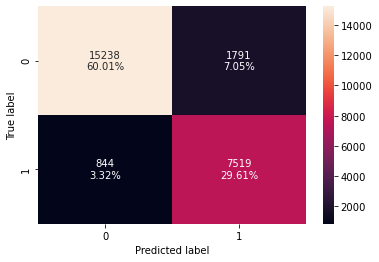

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [136]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.89623,0.89908,0.80763,0.85090


<IPython.core.display.Javascript object>

#### Checking performance on test set

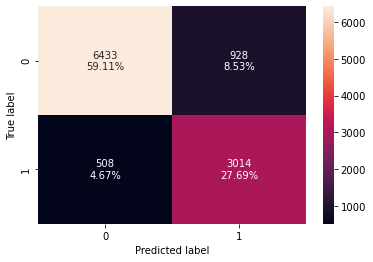

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [138]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.86805,0.85576,0.76459,0.80761


<IPython.core.display.Javascript object>

* With post-pruning we are getting good and generalized model performance on both training and test set.


### Visualizing the Decision Tree

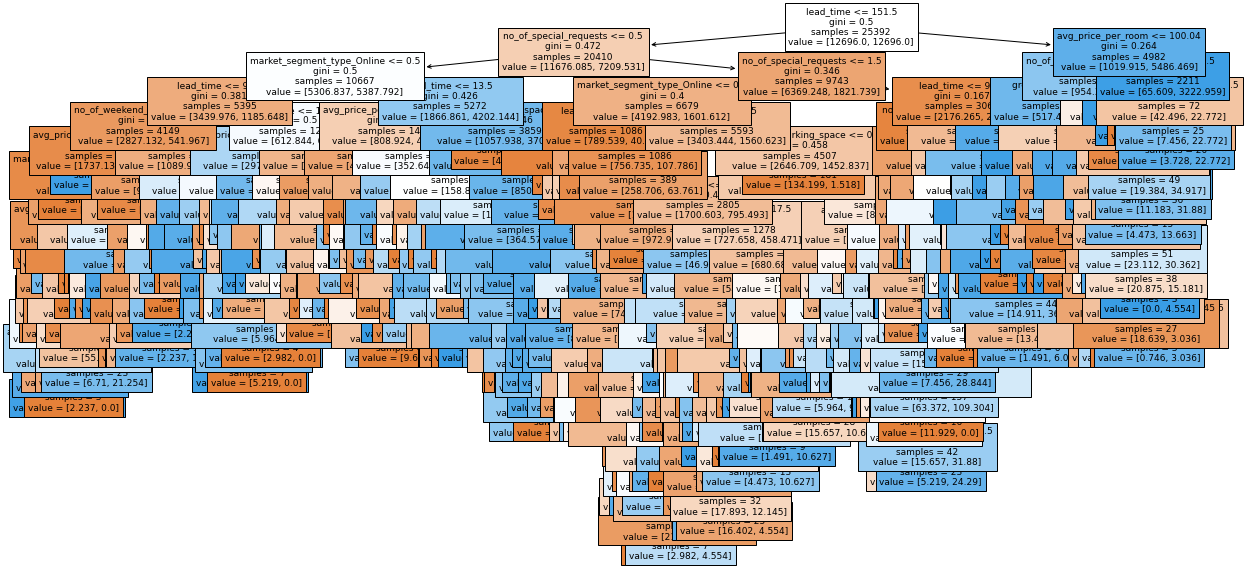

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- group_Single <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- group_Single >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

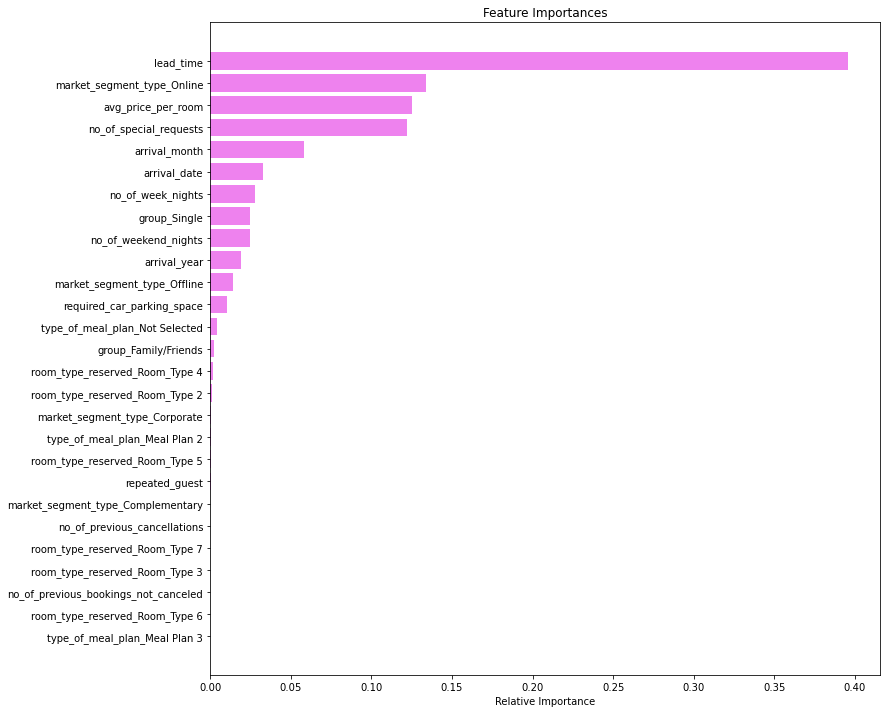

<IPython.core.display.Javascript object>

In [141]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time, market segment online, average price per room remain the most important feature with post-pruning too.

## Model Performance Comparison and Conclusions

### Decision Tree

In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83066,0.89623
Recall,0.98661,0.78608,0.89908
Precision,0.99578,0.72361,0.80763
F1,0.99117,0.75355,0.85090


<IPython.core.display.Javascript object>

In [143]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87209,0.83460,0.86805
Recall,0.81516,0.78336,0.85576
Precision,0.79485,0.72682,0.76459
F1,0.80488,0.75403,0.80761


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

### Logistic Regression and Decision Tree

In [144]:
# training performance comparison

models_train_comp_final_df = pd.concat(
    [
        log_reg_model_train_perf_threshold_curve.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_final_df.columns = [
    "Logistic Regression-0.42 Threshold",
    "Decision Tree (Post-Pruning)",
]

print("Training performance comparison final:")
models_train_comp_final_df

Training performance comparison final:


,Logistic Regression-0.42 Threshold,Decision Tree (Post-Pruning)
Accuracy,0.80045,0.89623
Recall,0.69736,0.89908
Precision,0.69694,0.80763
F1,0.69715,0.85090


<IPython.core.display.Javascript object>

In [145]:
# test performance comparison

models_test_comp_final_df = pd.concat(
    [log_reg_model_test_perf_threshold_curve.T, decision_tree_postpruned_perf_test.T,],
    axis=1,
)
models_test_comp_final_df.columns = [
    "Logistic Regression-0.42 Threshold",
    "Decision Tree (Post-Pruning)",
]

print("Test performance comparison final:")
models_test_comp_final_df

Test performance comparison final:


,Logistic Regression-0.42 Threshold,Decision Tree (Post-Pruning)
Accuracy,0.80226,0.86805
Recall,0.69932,0.85576
Precision,0.69263,0.76459
F1,0.69596,0.80761


<IPython.core.display.Javascript object>

* From the performance matrix we can observe that Decision Tree gives the better accuracy(86%) when predicting hotel booking cancellation based on certain features.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

1. We have been able to predict the cancellation with an accuarcy of 87%.
    
2. The model indicates that the most significant predictors of booking cancellation are - 

    - Number of days between the date of booking and the arrival date(lead time) 
    - Market segment type
    - Average price per day of the reservation
    - Total number of special requests made by the customer
    - Month of arrival date 
    - Number of nights of stay
    - Booking group - Single, Couple or Family/Friends
    - Availability of car parking space.

**Lead Time & Cancellation rate**

Cancellation rate is higher with higher lead time.Cancellation is positively correlated with lead time.
Hence setting a limit for maximum lead time allowed for a booking helps to reduce cancellation.


**Market Segment & Cancellation rate**

 We can observe that majority of the bookings were made for segment 'online' and cancellations are also comparitively more in 'Online' segment where as percentage of the bookings confirmed for 'Complimentary' and 'Corporate' segment is higher.
 Hotel could promote corporate bookings.


**Repeated Guest**

Repeated guest are more likely to confirm their booking than the non repeated guest.Percentage rate of repeated guests is higher in Complementary and Corporate segments compared to other market segments.    


**Arrival month**

October, September and August months shows most number of bookings. The cancellation rate is high in July and June.
Hotels can make their booking policies more aggressive in offseason period to reduce cancellations.
 
**Group**

Cancellation rate of single booking is comparitively less than couple and family bookings.

**Require Parking**

Cancellation rate is very less for the bookings which opt for car parking space. Hotel could promote customers that drives by offering valet service, free parking etc.


# ---------------------------------------------**The End**-------------------------------------------------